In [9]:
import numpy as np
import scipy as sp
import pandas as pd
import re
import csv
import json
import pprint
pp = pprint.PrettyPrinter(indent=4)
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [10]:
filename = '/home/claire/Documents/jobs/milieu/milieu-noumea/noumea-analysis/python-noumea-sept13.csv'
df = pd.DataFrame.from_csv(filename, header=0, sep=',', index_col=0)
pd.options.display.max_columns = 999
df

,participant_id,email,age,enable_receive_emails,lives_in_noumea,months_lived_in_noumea,neighbourhood,question_body_q1-1,question_body_q1-10,question_body_q1-11,question_body_q1-2,question_body_q1-3,question_body_q1-4,question_body_q1-5,question_body_q1-6,question_body_q1-7,question_body_q1-8,question_body_q1-9,question_body_q2-1,question_body_q2-10,question_body_q2-11,question_body_q2-12,question_body_q2-13,question_body_q2-14,question_body_q2-2,question_body_q2-3,question_body_q2-4,question_body_q2-5,question_body_q2-6,question_body_q2-7,question_body_q2-8,question_body_q2-9,question_body_q3-1,question_body_q3-10,question_body_q3-2,question_body_q3-3,question_body_q3-4,question_body_q3-5,question_body_q3-6,question_body_q3-7,question_body_q3-8,question_body_q3-9,question_body_q4-1,question_body_q4-10,question_body_q4-11,question_body_q4-12,question_body_q4-13,question_body_q4-2,question_body_q4-3,question_body_q4-4,question_body_q4-5,question_body_q4-6,question_body_q4-7,question_body_q4-8,question_body_q4-9,question_body_q5-1,question_body_q5-2,question_body_q5-3,question_body_q5-4,question_body_q5-5,question_body_q5-6,question_body_q5-7,question_body_q5-8,question_body_q5-9,text_q1-1,text_q1-10,text_q1-11,text_q1-2,text_q1-3,text_q1-4,text_q1-5,text_q1-6,text_q1-7,text_q1-8,text_q1-9,text_q1-comment,text_q2-1,text_q2-10,text_q2-11,text_q2-12,text_q2-13,text_q2-14,text_q2-2,text_q2-3,text_q2-4,text_q2-5,text_q2-6,text_q2-7,text_q2-8,text_q2-9,text_q2-comment,text_q3-1,text_q3-10,text_q3-2,text_q3-3,text_q3-4,text_q3-5,text_q3-6,text_q3-7,text_q3-8,text_q3-9,text_q3-comment,text_q4-1,text_q4-10,text_q4-11,text_q4-12,text_q4-13,text_q4-2,text_q4-3,text_q4-4,text_q4-5,text_q4-6,text_q4-7,text_q4-8,text_q4-9,text_q4-comment,text_q5-1,text_q5-2,text_q5-3,text_q5-4,text_q5-5,text_q5-6,text_q5-7,text_q5-8,text_q5-9,text_q5-comment,watson_categories_q1-comment,watson_categories_q2-comment,watson_categories_q3-comment,watson_categories_q4-comment,watson_categories_q5-comment,watson_entities_q1-comment,watson_entities_q2-comment,watson_entities_q3-comment,watson_entities_q4-comment,watson_entities_q5-comment,watson_keywords_q1-comment,watson_keywords_q2-comment,watson_keywords_q3-comment,watson_keywords_q4-comment,watson_keywords_q5-comment,watson_score_q1-comment,watson_score_q2-comment,watson_score_q3-comment,watson_score_q4-comment,watson_score_q5-comment
3,29,jonathan.rebouillon@gmail.com,26.0,True,True,2 ans,Magenta,RDC espace public ouvert polyvalent (murs et c...,Bâtiments fermés au public pour réhabilitation,Maison du projet (accueil/ exposition),Bureaux co-working (bureaux partagés),Commerces,Espace à usage pluriel,Friche artistique-studios,Espace recherche scientifique,Café,Bureaux,Espaces verts et jardins potagers,Jardinières mobiles,Espace marchés éphémères (parvis + tables),Jardins potagers dans jardinières mobiles,Treillis avec hamacs,Mobilier urbain reconfigurable,Nouvelle station Néobus,Stands restauration rapide / stand glacier,Espace camionnettes restauration - Food truck,Aire de jeux pour enfants,Parasols géants,Espace skateboard,Mur végétal anti-bruit,Surfaces peintes toiles géantes pour artistes,Zones vertes créées par percement de l’asphalt...,Voie Express #1 déplacée,Parking en silo avec façades vertes,Voie Néobus retracée et réaménagée + Arrêts,Voie Karuia bus + Arrêts,Voie bus Raï + Gare Routière,Voie petit train,Voie cyclable + Vélib’,Voie piétonne,Connections piétonnes,Passerelle végétalisée,Parc botanique,Place publique avec jets d’eau,Espaces verts en cœur d’îlot,Littoral aménagé avec places publiques,Amphithéâtre flottant,"Zone village océanien (espace pédagogique, kio...","Zone culturelle (projection, auditorium, sculp...",Zone sport urbains (parc parkour et skateboard...,Jardins suspendus,Quais flottants avec jardins,Parc linéaire avec promenade,Piscine sur terrasse,Parvis du terminal croisiéristes,"Cité de la Création et de l'innovation (hôtel,...",Usage mixte: Bureaux + Logements,École de danse avec a

In [341]:
watson_scores = df[['watson_score_q1-comment', 'watson_score_q2-comment', 'watson_score_q3-comment', 'watson_score_q4-comment', 'watson_score_q5-comment']]
watson_scores.describe()

,watson_score_q1-comment,watson_score_q2-comment,watson_score_q3-comment,watson_score_q4-comment,watson_score_q5-comment
count,66.000000,61.000000,54.000000,45.000000,40.000000
mean,0.224817,0.158471,0.161590,0.233956,0.129102
std,0.372075,0.374387,0.333316,0.354479,0.346118
min,-0.576799,-0.774393,-0.654024,-0.342059,-0.586827
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.604078,0.452274,0.477231,0.553080,0.505230
max,0.950987,0.977417,0.891726,0.964816,0.780934


In [380]:
watson_keywords_q1 = df['watson_keywords_q1-comment'].dropna()
watson_keywords_q2 = df['watson_keywords_q2-comment'].dropna()
watson_keywords_q3 = df['watson_keywords_q3-comment'].dropna()
watson_keywords_q4 = df['watson_keywords_q4-comment'].dropna()
watson_keywords_q5 = df['watson_keywords_q5-comment'].dropna()

watson_categories_q1 = df['watson_categories_q1-comment'].dropna()
watson_categories_q2 = df['watson_categories_q2-comment'].dropna()
watson_categories_q3 = df['watson_categories_q3-comment'].dropna()
watson_categories_q4 = df['watson_categories_q4-comment'].dropna()
watson_categories_q5 = df['watson_categories_q5-comment'].dropna()

watson_entities_q1 = df['watson_entities_q1-comment'].dropna()
watson_entities_q2 = df['watson_entities_q2-comment'].dropna()
watson_entities_q3 = df['watson_entities_q3-comment'].dropna()
watson_entities_q4 = df['watson_entities_q4-comment'].dropna()
watson_entities_q5 = df['watson_entities_q5-comment'].dropna()

keywords_array = []
keywords_array.extend((watson_keywords_q1, watson_keywords_q2, watson_keywords_q3, watson_keywords_q4, watson_keywords_q5))

categories_array = []
categories_array.extend((watson_categories_q1, watson_categories_q2, watson_categories_q3, watson_categories_q4, watson_categories_q5))

entities_array = []
entities_array.extend((watson_entities_q1, watson_entities_q2, watson_entities_q3, watson_entities_q4, watson_entities_q5))

In [391]:
import ast
k = []
c = []
e = []
pattern = re.compile(r'[A-Z]')


def get_relevance(arr):
    for df in arr:
        for index, row in df.iteritems():
            x = row
            x = ast.literal_eval(x)
            if x != []:
                if not pattern.match(x[0]['text'][1]):
                    keyword_text = x[0]['text'][0].lower() + x[0]['text'][1:]
                else:
                    keyword_text = x[0]['text']
                keyword_relevance = x[0]['relevance']
                k.append({'index': index, 'keyword_text': keyword_text, 'keyword_relevance': keyword_relevance})


def get_categories(arr):
    for df in arr:
        for index, row in df.iteritems():
            x = row
            x = ast.literal_eval(x)
            if x != []:
                label = x[0]['label']
                c.append({'index': index, 'label': label})
                
def get_entities(arr):
    for df in arr:
        for index, row in df.iteritems():
            x = row
            x = ast.literal_eval(x)
            if x != []:
                entity_text = x[0]['text']
                count = x[0]['count']
                entity_type = x[0]['type']
                entity_sentiment = x[0]['sentiment']['score']
                entity_relevance = x[0]['relevance']
                e.append({'index': index, 'entity_text': entity_text, 'count': count, 'entity_type': entity_type, 
                          'entity_sentiment': entity_sentiment, 'entity_relevance': entity_relevance})

get_relevance(keywords_array)
get_categories(categories_array)
get_entities(entities_array)

[   {   'count': 1,
        'disambiguation': {'subtype': ['Country']},
        'relevance': 0.978347,
        'sentiment': {'score': 0.0},
        'text': 'RDC',
        'type': 'Location'}]
[   {   'count': 1,
        'relevance': 0.978347,
        'sentiment': {'score': 0.0},
        'text': 'nouvelles',
        'type': 'TelevisionShow'}]
[   {   'count': 1,
        'relevance': 0.9632959999999999,
        'sentiment': {'score': 0.0},
        'text': 'Il,serait',
        'type': 'Person'},
    {   'count': 1,
        'relevance': 0.351983,
        'sentiment': {'score': 0.38695399999999996},
        'text': 'Creer',
        'type': 'Person'}]
[   {   'count': 1,
        'relevance': 0.978347,
        'sentiment': {'score': 0.0},
        'text': 'la maison',
        'type': 'Facility'}]
[   {   'count': 1,
        'disambiguation': {'subtype': ['Region']},
        'relevance': 0.9632959999999999,
        'sentiment': {'score': 0.0},
        'text': 'centre',
        'type': 'Location

In [392]:
categories_df = pd.DataFrame(c)
keywords_df = pd.DataFrame(k)
entities_df = pd.DataFrame(e)

categories_df.set_index(['index'])
keywords_df.set_index(['index'])
entities_df.set_index(['index'])

,count,entity_relevance,entity_sentiment,entity_text,entity_type
index,,,,,
58,1,0.978347,0.000000,RDC,Location
66,1,0.978347,0.000000,nouvelles,TelevisionShow
90,1,0.963296,0.000000,"Il,serait",Person
118,1,0.978347,0.000000,la maison,Facility
125,1,0.963296,0.000000,centre,Location
142,1,0.978347,0.611838,RDC,Location
152,1,0.978347,0.000000,du gouvernement,Organization
182,1,0.978347,0.000000,centre,Location
193,1,0.978347,0.000000,RDC,Location


In [397]:
watson_df = keywords_df.merge(categories_df, on='index')
watson_df = watson_df.merge(entities_df, on='index')
watson_df

,index,keyword_relevance,keyword_text,label,count,entity_relevance,entity_sentiment,entity_text,entity_type
0,10,0.977061,d'espaces jeunesses,/art and entertainment/visual art and design/d...,1,0.978347,0.000000,centre,Location
1,10,0.977061,d'espaces jeunesses,/art and entertainment/visual art and design/d...,1,0.978347,0.727040,Piscine,Sport
2,10,0.977061,d'espaces jeunesses,/automotive and vehicles/bicycles and accessor...,1,0.978347,0.000000,centre,Location
3,10,0.977061,d'espaces jeunesses,/automotive and vehicles/bicycles and accessor...,1,0.978347,0.727040,Piscine,Sport
4,10,0.977061,d'espaces jeunesses,/sports/swimming,1,0.978347,0.000000,centre,Location
5,10,0.977061,d'espaces jeunesses,/sports/swimming,1,0.978347,0.727040,Piscine,Sport
6,10,0.922348,centre ville,/art and entertainment/visual art and design/d...,1,0.978347,0.000000,centre,Location
7,10,0.922348,centre ville,/art and entertainment/visual art and design/d...,1,0.978347,0.727040,Piscine,Sport
8,10,0.922348,centre ville,/automotive and vehicles/bicycles and accessor...,1,0.978347,0.000000,centre,Location
9,10,0.922348,centre ville,/automotive and vehicles/bicycles and accessor...,1,0.978347,0.727040,Piscine,Sport


In [402]:
watson_df['entity_type'].dropna().value_counts()

Location             317
Person               143
Sport                129
Facility             110
GeographicFeature     71
Organization          32
Company               31
TelevisionShow        25
NaturalEvent          13
Name: entity_type, dtype: int64

In [ ]:
keywords_df = keywords_df.sort_values(['relevance', 'text'], ascending=[0, 0])

In [367]:
# top_ten = keywords_df.head(10)
# top_ten
top_hundred = keywords_df.head(30)

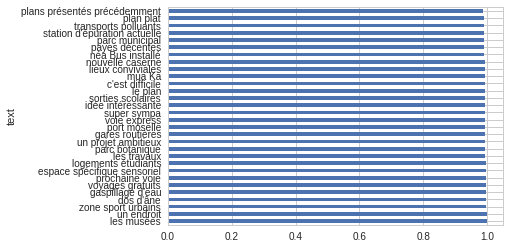

In [368]:
plt.style.use('seaborn-whitegrid')
plot = top_hundred.plot(y='relevance', x='text', kind='barh', legend=None)
plt.show()

In [ ]:
top_ten['relevance'] = top_ten['relevance'] ** 100
#     row['relevance'] = row['relevance'] ** 5
top_ten